In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '../input/example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

The database is in json format, so we extract the data following this format.

In [3]:
import json
records = [json.loads(line) for line in open(path)]

In [4]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [5]:
data = pd.DataFrame(records)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

# Time Zones
First, we are going to analyze the time zones (*tz* in the database).

In [6]:
data['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [7]:
tz_counts = data['tz'].value_counts()
tz_counts

America/New_York         1251
                          521
America/Chicago           400
America/Los_Angeles       382
America/Denver            191
                         ... 
America/Santo_Domingo       1
America/Lima                1
Asia/Yekaterinburg          1
Europe/Skopje               1
Australia/Queensland        1
Name: tz, Length: 97, dtype: int64

- Cleaning of data

In [8]:
clean_tz = data['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

- Visualization of data

Text(0, 0.5, 'Time Zones')

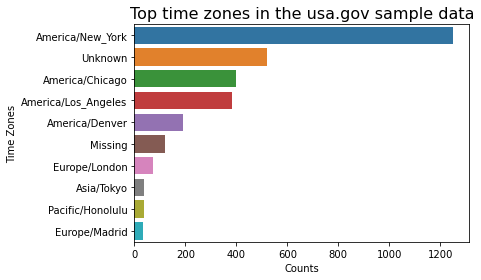

In [9]:
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)
plt.title('Top time zones in the usa.gov sample data', fontsize=16)
plt.xlabel("Counts")
plt.ylabel("Time Zones")

The most common time zone is New York with over 1200 counts

# Browser/Device

In [10]:
data['a'][:10]

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7    Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8    Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

- Cleaning of data

In [11]:
browser = pd.Series([x.split(' ')[0] for x in data['a'].dropna()])
browser.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
dtype: int64

The most used browser is Morzilla/5.0

# Operating system

In [12]:
clean_data = data[data['a'].notnull()]
clean_data['os'] = np.where(clean_data['a'].str.contains('Windows'), 'Windows', 'Not Windows')
clean_data['os'][:5]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [13]:
clean_data['tz'] = clean_data['tz'].fillna('Missing')
clean_data['tz'][clean_data['tz'] == ''] = 'Unknown'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [14]:
We group time zone and operating system

SyntaxError: invalid syntax (<ipython-input-14-89c37fde60f2>, line 1)

In [15]:
group_tz_os = clean_data.groupby(['tz', 'os'])

In [16]:
 counts_tz_os = group_tz_os.size().unstack().fillna(0)
    

In [17]:
counts_tz_os

os,Not Windows,Windows
tz,,
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
...,...,...
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0
Pacific/Auckland,3.0,8.0


In [18]:
indexer = counts_tz_os.sum(1).argsort()
indexer

tz
Africa/Cairo           75
Africa/Casablanca      36
Africa/Ceuta           35
Africa/Johannesburg    54
Africa/Lusaka          33
                       ..
Europe/Warsaw          14
Europe/Zurich          21
Pacific/Auckland       11
Pacific/Honolulu       96
Unknown                28
Length: 97, dtype: int64

In [19]:
subset = counts_tz_os.take(indexer[-10:])
subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
Unknown,245.0,276.0


In [20]:
subset = subset.stack()
subset.name = 'total'
subset = subset.reset_index()
subset

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


Text(0.5, 1.0, 'Top time zones by Windows and non-Windows users')

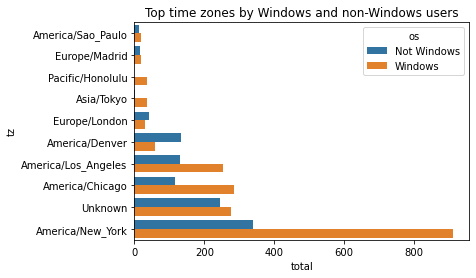

In [21]:
sns.barplot(x = 'total', y = 'tz', hue = 'os', data = subset)
plt.title('Top time zones by Windows and non-Windows users')

In [22]:
def normal_total(group):
    group['normal total'] = group.total/group.total.sum()
    return group

subset_normal = subset.groupby('tz').apply(normal_total)
subset_normal

,tz,os,total,normal total
0,America/Sao_Paulo,Not Windows,13.0,0.393939
1,America/Sao_Paulo,Windows,20.0,0.606061
2,Europe/Madrid,Not Windows,16.0,0.457143
3,Europe/Madrid,Windows,19.0,0.542857
4,Pacific/Honolulu,Not Windows,0.0,0.000000
5,Pacific/Honolulu,Windows,36.0,1.000000
6,Asia/Tokyo,Not Windows,2.0,0.054054
7,Asia/Tokyo,Windows,35.0,0.945946
8,Europe/London,Not Windows,43.0,0.581081
9,Europe/London,Windows,31.0,0.418919


Text(0.5, 1.0, 'Percentage Windows and non-Windows users in top-occurring time zones')

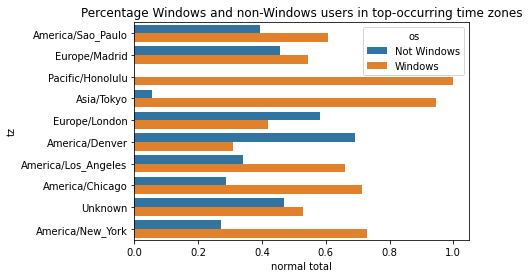

In [23]:
sns.barplot(x = 'normal total', y = 'tz', hue = 'os', data = subset_normal)
plt.title('Percentage Windows and non-Windows users in top-occurring time zones')